In [185]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import networkx as nx
import pandas as pd
import numpy as np

In [216]:
df = pd.read_csv("data/graph_second_s/fb_country_country_sample_4_size1000.txt",header=None,names="source target weight".split())
G = nx.from_pandas_edgelist(df,edge_attr="weight")

In [217]:
nx.spring_layout

<function networkx.drawing.layout.fruchterman_reingold_layout(G, k=None, pos=None, fixed=None, iterations=50, threshold=0.0001, weight='weight', scale=1, center=None, dim=2, seed=None)>

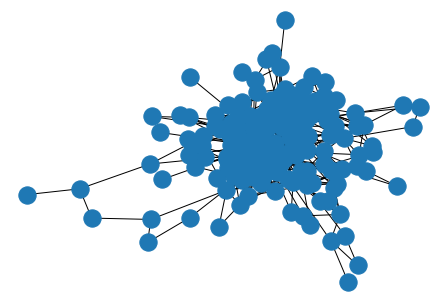

In [218]:
nx.draw(G,pos=nx.spring_layout(G,weight=None))

In [219]:
import joblib,json
iso2_name = json.load(open("data/ISO3166-1.alpha2.json.txt"))
encoder = joblib.load("data/graph_second_s/encoder.joblib")
labels_dict = {}
for node in list(G.nodes()):
    labels_dict[node] = iso2_name[encoder.inverse_transform([node])[0]]
    G.nodes[node]["label"] = labels_dict[node]

100%|██████████| 2000/2000 [00:01<00:00, 1394.34it/s]


BarnesHut Approximation  took  0.49  seconds
Repulsion forces  took  0.67  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.11  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


(-411.5499692665245, 417.5668333515015, -324.1927530334269, 513.3938371688753)

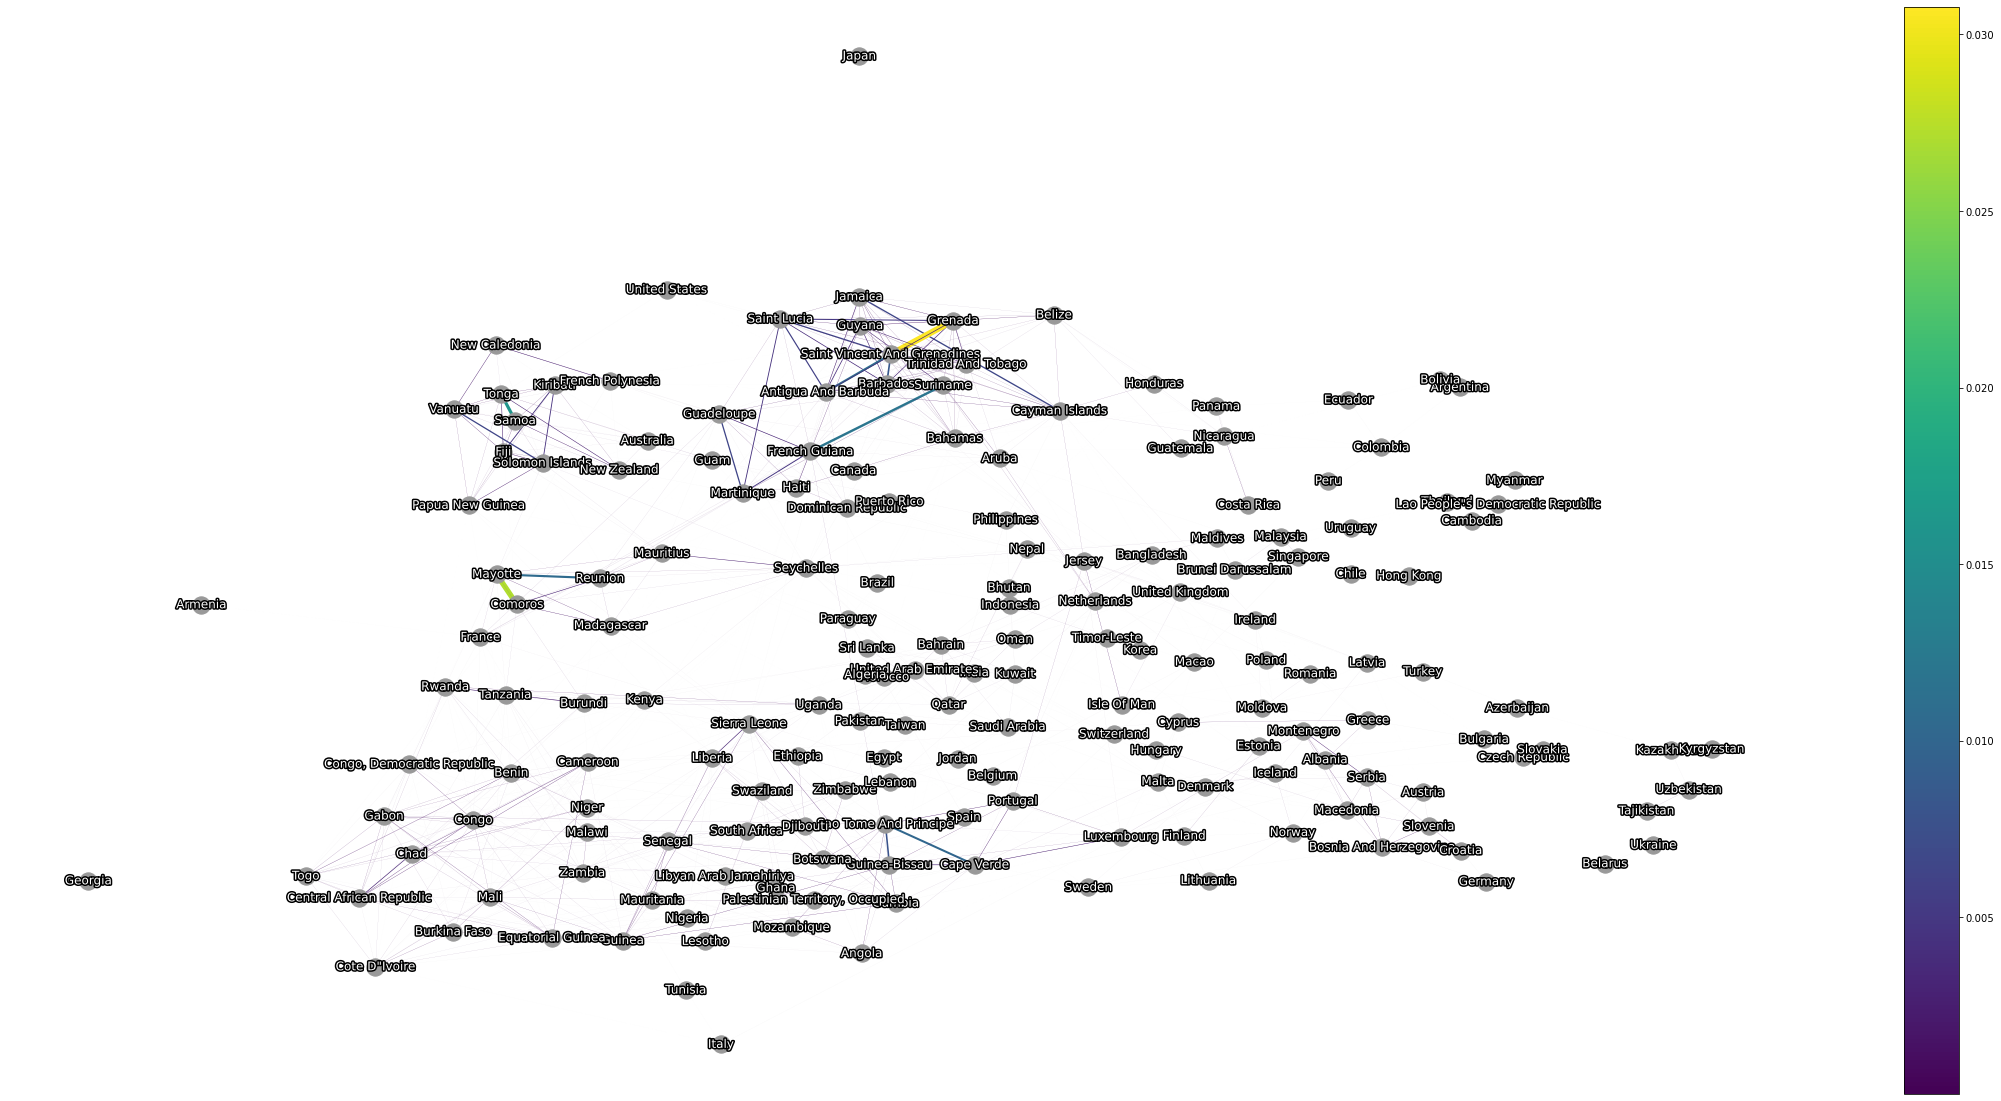

In [220]:
from fa2 import ForceAtlas2
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0.1,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=3.0,
                        strongGravityMode=False,
                        gravity=5,

                        # Log
                        verbose=False)

positions = forceatlas2.forceatlas2_networkx_layout(G,
                                                    pos=None, 
                                                    iterations=2000)
fig,ax = plt.subplots(1,figsize=(40,20))
nodes = nx.draw_networkx_nodes(G,positions,node_color='#999',ax=ax)
weights_width = [G[u][v]['weight']*200 for u,v in list(G.edges())]
colors= [G[u][v]['weight'] for u,v in list(G.edges())]
edges = nx.draw_networkx_edges(G,positions,edge_color=colors,width=weights_width,
                               edge_cmap=plt.cm.viridis,ax=ax)
#labels = nx.draw_networkx_labels(G,positions,font_color="k",labels=labels_dict)
for node,pos in positions.items():
    text = ax.text(pos[0], pos[1], labels_dict[node], color='white',
                          ha='center', va='center', size=12)
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                           path_effects.Normal()])
plt.colorbar(edges)
plt.axis("off")


In [208]:
nx.write_gexf(G,"test.gexf")

In [172]:
nx.draw_networkx_labels?

Signature:
nx.draw_networkx_labels(
    G,
    pos,
    labels=None,
    font_size=12,
    font_color='k',
    font_family='sans-serif',
    font_weight='normal',
    alpha=None,
    bbox=None,
    horizontalalignment='center',
    verticalalignment='center',
    ax=None,
)
Docstring:
Draw node labels on the graph G.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary
   A dictionary with nodes as keys and positions as values.
   Positions should be sequences of length 2.

labels : dictionary, optional (default=None)
   Node labels in a dictionary keyed by node of text labels
   Node-keys in labels should appear as keys in `pos`.
   If needed use: `{n:lab for n,lab in labels.items() if n in pos}`

font_size : int
   Font size for text labels (default=12)

font_color : string
   Font color string (default='k' black)

font_family : string
   Font family (default='sans-serif')

font_weight : string
   Font weight (default='normal')

alpha : float or None
   The text tra

{(159, 14): 0.00034452986353579614,
 (14, 32): 0.0006647461036540959,
 (60, 153): 0.0007769145535669863,
 (60, 28): 6.095120425812884e-05,
 (60, 32): 0.0003660286011723466,
 (57, 154): 0.011984992752136362,
 (57, 62): 1.1706278033147387e-05,
 (57, 111): 0.004696546894748076,
 (154, 67): 0.00256676404596247,
 (37, 138): 0.0016860322501760228,
 (37, 155): 0.010137258419588523,
 (37, 66): 0.0029650669650766715,
 (177, 164): 0.016001159340909073,
 (177, 127): 0.0018321259618369746,
 (164, 176): 0.0009318206431424287,
 (125, 74): 1.1352233019943424e-05,
 (74, 99): 2.9052964173647212e-05,
 (90, 67): 0.0006335886229856527,
 (90, 80): 0.006607647687126951,
 (67, 1): 0.003673998038329272,
 (67, 166): 0.0025566927569173376,
 (67, 55): 0.0014116093772805892,
 (67, 26): 0.0005472844528678321,
 (80, 1): 0.0026080201667929453,
 (80, 22): 0.0008909899841303957,
 (1, 11): 0.002368437298555225,
 (1, 174): 0.010831736706819282,
 (1, 26): 0.0001925313496374597,
 (1, 55): 0.003444876972305754,
 (62, 77): 